### Problem Statement:

You are a data scientist / AI engineer working on a multiclass classification problem. You have been provided with a dataset named **`"dry_bean_dataset.xlsx"`**, which includes various features of dry beans to predict their class. The dataset comprises the following columns:

- `area:` The area of a bean zone and the number of pixels within its boundaries.
- `perimeter:` Bean circumference is defined as the length of its border.
- `majorAxisLength:` The distance between the ends of the longest line that can be drawn from a bean.
- `minorAxisLength:` The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- `aspectRatio:` Defines the relationship between the major and minor axis lengths.
- `eccentricity:` Eccentricity of the ellipse having the same moments as the region.
- `convexArea:` Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- `equivDiameter:` The diameter of a circle having the same area as a bean seed area.
- `extent:` The ratio of the pixels in the bounding box to the bean area.
- `solidity:` Also known as convexity, the ratio of the pixels in the convex shell to those found in beans.
- `roundness:` Calculated with the formula: (4 * π * Area) / (Perimeter^2).
- `compactness:` Measures the roundness of an object: EquivalentDiameter / MajorAxisLength.
- `shapeFactor1:` The ratio of Area to the square of Perimeter.
- `shapeFactor2:` The ratio of Area to the square of MajorAxisLength.
- `shapeFactor3:` The ratio of Area to the product of MajorAxisLength and MinorAxisLength.
- `shapeFactor4:` The ratio of Perimeter to the product of MajorAxisLength and MinorAxisLength.
- `class:` The class of the bean (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira).

Your task is to use this dataset to build and evaluate a Logistic Regression model to classify the beans into their respective classes.

### Dataset Citation
This dataset is used under citation guidelines from the original authors. For detailed study and dataset description, see the following references:

- **Citation**: KOKLU, M. and OZKAN, I.A., (2020), Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques. Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507 
- **Dataset available at**: [Murat Koklu's Dataset Page](https://www.muratkoklu.com/datasets/)

**Import Necessary Libraries**

In [1]:
#Import Necessary Libraries
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt 


### Task 1: Data Preparation and Exploration

1. Import the data from the `"dry_bean_dataset.xlsx"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Check the distribution of classes in the target variable.
6. Visualize the distribution of features `(area, perimeter, major_axis_length, minor_axis_length)` using scatter plots.

In [3]:
# Step 1: Import the data
df = pd.read_excel("dry_bean_dataset.xlsx")


# Step 2: Display the number of rows and columns
print(df.shape)

# Step 3: Display the first few rows of the dataset
df.head()

(13611, 17)


,area,perimeter,major_axis_length,minor_axis_length,aspect_ratio,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor1,shape_factor2,shape_factor3,shape_factor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Step 4: Check for any missing values
df.isnull().sum()

area                 0
perimeter            0
major_axis_length    0
minor_axis_length    0
aspect_ratio         0
eccentricity         0
convex_area          0
equiv_diameter       0
extent               0
solidity             0
roundness            0
compactness          0
shape_factor1        0
shape_factor2        0
shape_factor3        0
shape_factor4        0
class                0
dtype: int64

In [6]:
# Step 5: Check the distribution of classes in the target variable
df["class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

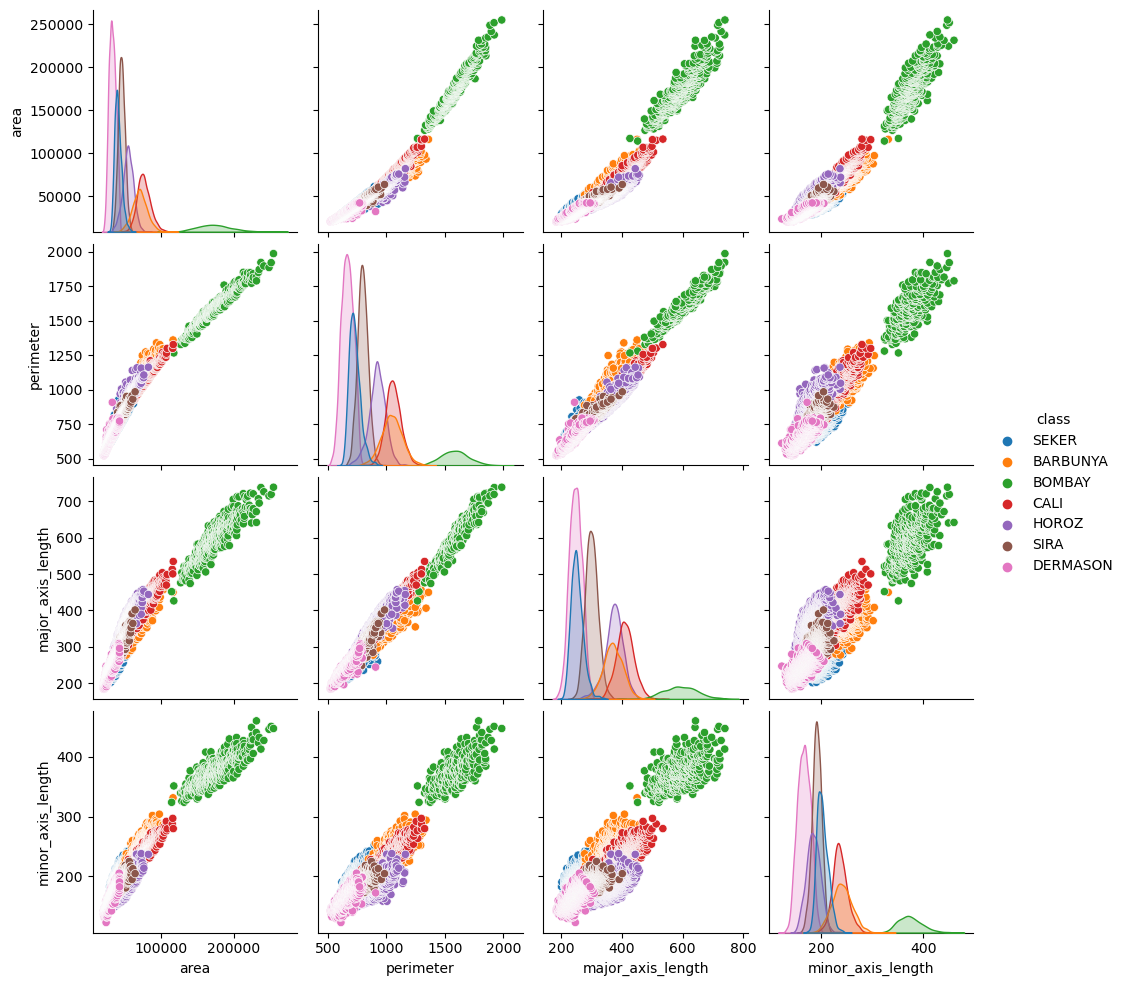

In [9]:
# Step 6: Visualize the distribution of features (area, perimeter, major_axis_length, minor_axis_length) using scatter plots.
sns.pairplot(df , vars =["area", "perimeter", "major_axis_length","minor_axis_length"] , hue = "class")

### Task 2: Data Preprocessing

1. Select the features (all columns except 'class') and the target variable for modeling.
   
2. Split the data into training and testing sets with a test size of 30%.

In [12]:
# Step 1: Select features and target variable
X = df.drop("class", axis =1 )
y = df["class"]
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

### Task 3: Model Training and Evaluation Using Logistic Regression

1. Initialize and train a Logistic Regression model using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.
4. Plot the confusion matrix for the Logistic Regression model.

In [13]:
# Step 1: Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train , y_train )

C:\Users\PARAG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Step 2: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report.
from sklearn.metrics import classification_report

report = classification_report(y_test , y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.63      0.54      0.58       386
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.75      0.75      0.75       495
    DERMASON       0.82      0.88      0.85      1068
       HOROZ       0.57      0.59      0.58       543
       SEKER       0.70      0.64      0.67       607
        SIRA       0.61      0.63      0.62       828

    accuracy                           0.71      4084
   macro avg       0.73      0.72      0.72      4084
weighted avg       0.71      0.71      0.71      4084



In [16]:
# Step 4: Plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm`

array([[208,   0,  99,   0,  76,   0,   3],
       [  0, 157,   0,   0,   0,   0,   0],
       [105,   0, 369,   0,  17,   1,   3],
       [  0,   0,   0, 935,   6,  45,  82],
       [ 11,   0,  23,  21, 318,   9, 161],
       [  3,   0,   1, 120,  10, 390,  83],
       [  1,   0,   0,  60, 133, 112, 522]], dtype=int64)

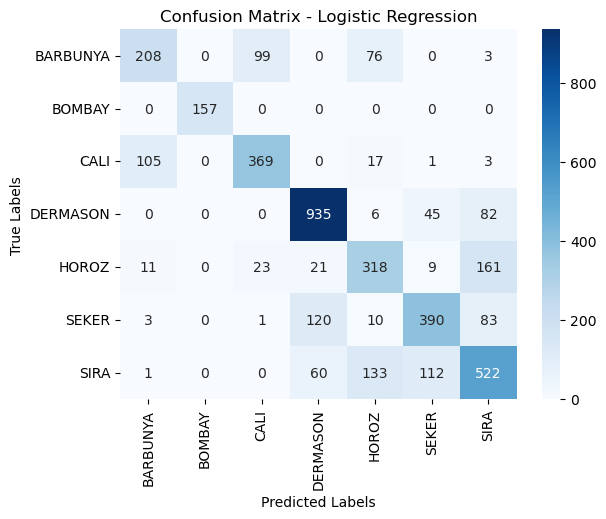

In [18]:
classes = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
# Step 2: Ma

### Task 4: Train Logistic Regression with Specific Parameters

1. Train a Logistic Regression model with specified parameters:
    - Max iterations: 300
    - Regularization strength (C): 0.5
    - 'tol': 0.001
    - class_weight: 'balanced'
<br></br>

Learn about these parameters here: [scikit-learn LogisticRegression Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

-------------------------------------------------------------------------------------------------------------------------------------------------------



2. Make predictions on the test set using the trained model.
   
3. Evaluate the model using a classification report and print the report.
   
4. Plot the confusion matrix for this Logistic Regression model.


In [21]:
# Step 1: Train a Logistic Regression model with specified parameters
model1 = LogisticRegression(tol=0.001 , C =  0.5, class_weight="balanced" ,max_iter=300)
model1.fit(X_train , y_train )

C:\Users\PARAG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, class_weight='balanced', max_iter=300, tol=0.001)

In [23]:
# Step 3: Evaluate the model using a classification report
y_pred = model1.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report.
from sklearn.metrics import classification_report

report = classification_report(y_test , y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.74      0.79      0.77       386
      BOMBAY       1.00      1.00      1.00       157
        CALI       0.87      0.83      0.85       495
    DERMASON       0.89      0.81      0.85      1068
       HOROZ       0.81      0.81      0.81       543
       SEKER       0.69      0.77      0.73       607
        SIRA       0.72      0.75      0.74       828

    accuracy                           0.80      4084
   macro avg       0.82      0.82      0.82      4084
weighted avg       0.81      0.80      0.80      4084



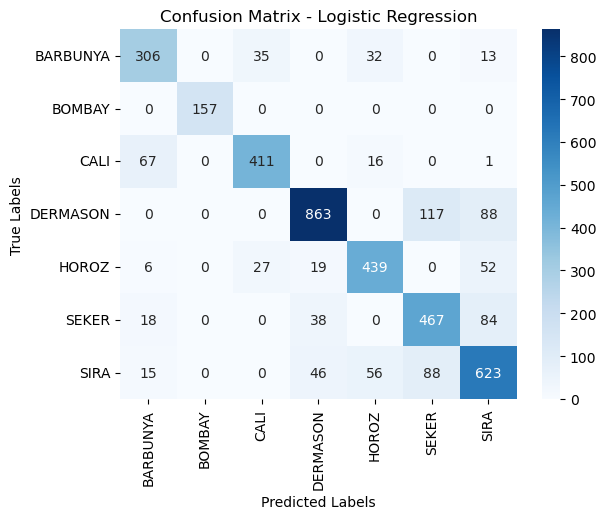

In [24]:
# Step 4: Plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)
classes = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
